<font size="5"><b>Case Study I</b><br><br>
Module 8: Dimensionality Reduction
 </font>

<font color='red'>
Objective:<br><br>
• Understand and practice principal component analysis using scikit learn.
Questions:<br><br>
1. Scikit learn comes with pre-loaded dataset, load the digits dataset from that
collection and write a helper function to plot the image using matplotlib.<br>
[Hint: Explore datasets module from scikit learn]<br><br>
2. Make a train -test split with 20% of the data set aside for testing. Fit a logistic
regression model and observe the accuracy.<br><br>
3. Using scikit learn perform a PCA transformation such that the transformed
dataset can explain 95% of the variance in the original dataset. Find out the
number of components in the projected subspace.<br>
[Hint: Refer to decomposition module of scikit learn]<br><br>
4. Transform the dataset and fit a logistic regression and observe the accuracy.
Compare it with the previous model and comment on the accuracy.<br>
[Hint: Project both the train and test samples to the new subspace]<br><br>
5. Compute the confusion matrix and count the number of instances that has
gone wrong. For each of the wrong sample, plot the digit along with predicted
and original label.<br>

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
from sklearn import datasets, svm, metrics

In [227]:
datafile = datasets.load_digits()

In [228]:
x =datafile.images


In [229]:
datafile.data.shape

(1797, 64)

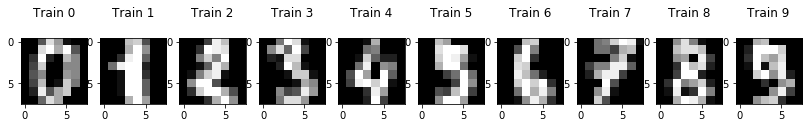

In [230]:
plt.figure(figsize=(14,18))
for index , (image,label) in enumerate(zip(datafile.data[0:10],datafile.target[0:10])):
    #print(image)
    #print(label)
    plt.subplot(1,10,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Train %i\n'%label)
x=datafile.data
y=datafile.target

LogisticRegression  logis

In [231]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=.20)
logic_model = LogisticRegression()
logic_model.fit(train_x,train_y)
y_pred = logic_model.predict(test_x)

metrics.accuracy_score(y_pred,test_y)

C:\Users\Senjuti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Senjuti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9694444444444444

In [232]:
df = pd.DataFrame(datafile.data)

In [233]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [234]:
df.index.names=['no.']
df.columns.names=['type']
df.fillna(15)
df.head(5)

type,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
no.,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [235]:
from sklearn.decomposition import PCA


In [236]:
pca = PCA(n_components=15)
pca.fit(df)


PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [237]:
print(pca.explained_variance_ratio_.round(2))

[0.15 0.14 0.12 0.08 0.06 0.05 0.04 0.04 0.03 0.03 0.02 0.02 0.02 0.02
 0.01]


In [238]:
df_2d = pca.transform(df)

df_2d_df1 = pd.DataFrame(df_2d)

df_2d_df1.index = df.index
df_2d_df1.columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15']
df_2d_df1.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
no.,,,,,,,,,,,,,,,
0,-1.259466,21.274884,-9.463054,13.014196,-7.128834,-7.440704,3.252670,2.553368,-0.581328,3.626901,2.587149,1.555892,0.833891,-3.331708,5.919639
1,7.957611,-20.768699,4.439506,-14.893651,5.896251,-6.485803,2.125949,-4.616053,3.588504,-1.072489,-5.378405,-2.124739,-2.599952,-6.489766,-2.289687
2,6.991924,-9.955987,2.958559,-12.288304,-18.126023,-4.507478,1.843157,-16.414652,0.719825,4.257201,-1.241211,-0.374324,0.222980,6.834581,-1.594652
3,-15.906105,3.332464,9.824371,-12.275846,6.965181,1.089528,-1.041890,10.973487,-3.260713,6.497555,-5.065210,2.390019,2.665878,-4.553966,0.769794
4,23.306867,4.269061,-5.675129,-13.851525,-0.358123,-2.857689,-0.720432,13.041297,-3.836248,13.412693,2.678565,-1.766347,-5.283723,1.521722,-0.743563


In [239]:
x1=df_2d_df1[:]
y1=datafile.target

In [240]:

train_x1,test_x1,train_y1,test_y1 = train_test_split(x1,y1,test_size=.20)
logic_pca_model = LogisticRegression()

In [241]:
logic_pca_model.fit(train_x1,train_y1)
y_pca_pred1 = logic_pca_model.predict(test_x1)

C:\Users\Senjuti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Senjuti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [242]:
metrics.accuracy_score(y_pca_pred1,test_y1)

0.9666666666666667